<a href="https://colab.research.google.com/github/Vinayak178-collab/VINAYAK/blob/main/LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.array([1, x_query[0]])

    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

In [ ]:

db = pd.read_csv('/content/drive/MyDrive/housing.csv')
db.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:

X = db[['housing_median_age']].values
Y = db['median_house_value'].values

In [ ]:
X_Query = np.array([41]); # Predicting for this input
tau = 0.1 #bandwidth parameter
y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for a house with 30 years old: {y_query}")

Predicted median house value for a house with 30 years old: 197253.77364864876


Predicted median house value for housing median age 10: 193923.82789030776
Predicted median house value for housing median age 20: 198521.40640040388
Predicted median house value for housing median age 30: 205106.16873237348
Predicted median house value for housing median age 40: 214431.02664171837
Predicted median house value for housing median age 50: 242024.36162520997


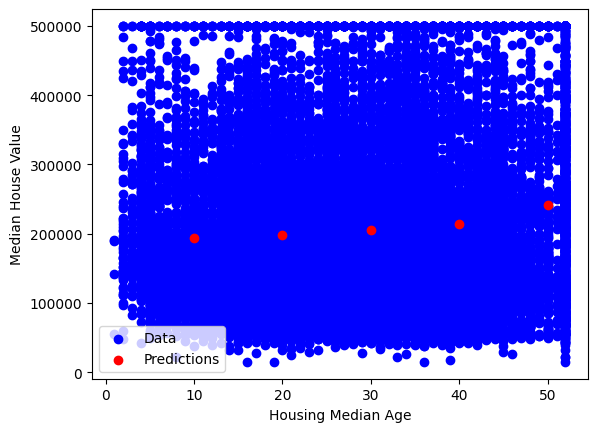

In [ ]:
# Predict for multiple x_query values
x_queries = np.array([10, 20, 30, 40, 50])  # Replace with your desired query points
predictions = []

for x_query in x_queries:
    x_query = np.array([x_query])  # Ensure x_query is a 1D array
    y_query = locally_weighted_regression(X, Y, tau=10, x_query=x_query)
    predictions.append(y_query)
    print(f"Predicted median house value for housing median age {x_query[0]}: {y_query}")

# Optionally, visualize the predictions
plt.scatter(X, Y, color='blue', label='Data')
plt.scatter(x_queries, predictions, color='red', label='Predictions')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

Predicted target for features [10 20]: -0.52
Predicted target for features [20 30]: 13.13
Predicted target for features [30 40]: 26.68
Predicted target for features [40 50]: 40.57
Predicted target for features [50 60]: 52.64


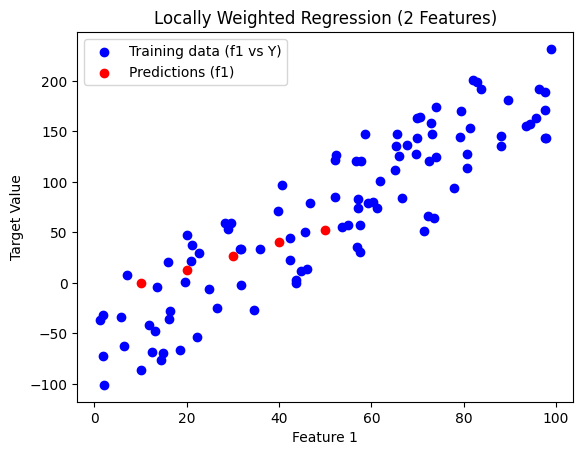

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate dataset with 2 features
np.random.seed(0)
m = 100
X = np.random.rand(m, 2) * 100  # 100 samples, 2 features
theta_true = np.array([2.5, -1.2])  # true coefficients for f1 and f2
Y = X @ theta_true + np.random.randn(m) * 5  # noisy target values

# Add intercept (bias) term
X_with_bias = np.hstack([np.ones((m, 1)), X])

# Step 2: Locally Weighted Regression
def locally_weighted_regression(X, Y, tau, x_query):
    m = X.shape[0]
    W = np.eye(m)

    for i in range(m):
        diff = X[i] - x_query
        W[i, i] = np.exp(-np.dot(diff, diff) / (2 * tau**2))

    XTWX = X.T @ W @ X
    if np.linalg.det(XTWX) == 0:
        theta = np.linalg.pinv(XTWX) @ X.T @ W @ Y
    else:
        theta = np.linalg.inv(XTWX) @ X.T @ W @ Y

    y_pred = x_query @ theta
    return y_pred

# Step 3: Predict for multiple x_query values
x_queries = np.array([
    [10, 20],
    [20, 30],
    [30, 40],
    [40, 50],
    [50, 60]
])

predictions = []

for x_query in x_queries:
    x_query_with_bias = np.hstack(([1], x_query))  # Add bias term
    y_query = locally_weighted_regression(X_with_bias, Y, tau=10, x_query=x_query_with_bias)
    predictions.append(y_query)
    print(f"Predicted target for features {x_query}: {y_query:.2f}")

# Optional: Visualize predictions (only for 1st feature vs Y for simplicity)
plt.scatter(X[:, 0], Y, color='blue', label='Training data (f1 vs Y)')
plt.scatter(x_queries[:, 0], predictions, color='red', label='Predictions (f1)')
plt.xlabel('Feature 1')
plt.ylabel('Target Value')
plt.legend()
plt.title('Locally Weighted Regression (2 Features)')
plt.show()


Predicted disease progression for features [0.05 0.05]: 153.51
Predicted disease progression for features [ 0.1 -0.2]: 151.93
Predicted disease progression for features [-0.5  0.3]: 129.33
Predicted disease progression for features [0. 0.]: 149.96
Predicted disease progression for features [0.2 0.1]: 161.83


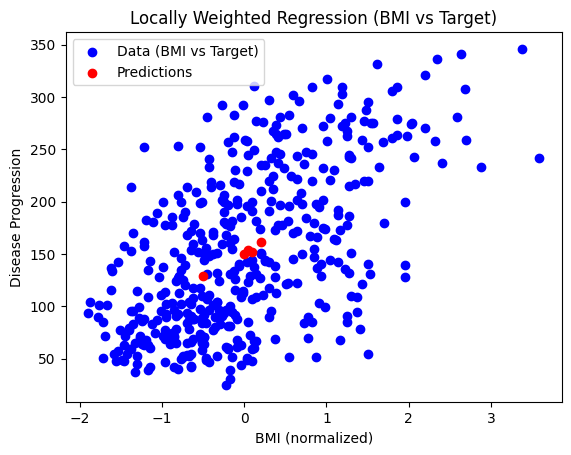

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Step 1: Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # shape (442, 10)
Y = diabetes.target  # shape (442,)

# Step 2: Select 2 features: BMI (index 2) and BP (index 3)
X = X[:, [2, 3]]  # 2D input features

# Step 3: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term
m = X.shape[0]
X_with_bias = np.hstack([np.ones((m, 1)), X])

# Step 4: LWR implementation
def locally_weighted_regression(X, Y, tau, x_query):
    m = X.shape[0]
    W = np.eye(m)

    for i in range(m):
        diff = X[i] - x_query
        W[i, i] = np.exp(-np.dot(diff, diff) / (2 * tau**2))

    XTWX = X.T @ W @ X
    if np.linalg.det(XTWX) == 0:
        theta = np.linalg.pinv(XTWX) @ X.T @ W @ Y
    else:
        theta = np.linalg.inv(XTWX) @ X.T @ W @ Y

    y_pred = x_query @ theta
    return y_pred

# Step 5: Predict for a few sample points (use normalized feature scale)
x_queries = np.array([
    [0.05, 0.05],
    [0.1, -0.2],
    [-0.5, 0.3],
    [0.0, 0.0],
    [0.2, 0.1]
])

predictions = []

for x_query in x_queries:
    x_query_with_bias = np.hstack(([1], x_query))  # Add bias
    y_query = locally_weighted_regression(X_with_bias, Y, tau=0.5, x_query=x_query_with_bias)
    predictions.append(y_query)
    print(f"Predicted disease progression for features {x_query}: {y_query:.2f}")

# Step 6: Visualization (only for first feature vs target)
plt.scatter(X[:, 0], Y, color='blue', label='Data (BMI vs Target)')
plt.scatter(x_queries[:, 0], predictions, color='red', label='Predictions')
plt.xlabel('BMI (normalized)')
plt.ylabel('Disease Progression')
plt.title('Locally Weighted Regression (BMI vs Target)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np

def run_knn_lwr_comparison(X, y, k=5, tau=0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 1. KNN Regression
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    # 2. LWR
    X_train_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_test_b = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

    def lwr_predict(X_train, y_train, x_query, tau):
        m = X_train.shape[0]
        W = np.eye(m)
        for i in range(m):
            diff = X_train[i] - x_query
            W[i, i] = np.exp(-np.dot(diff, diff) / (2 * tau ** 2))
        XTWX = X_train.T @ W @ X_train
        if np.linalg.det(XTWX) == 0:
            theta = np.linalg.pinv(XTWX) @ X_train.T @ W @ y_train
        else:
            theta = np.linalg.inv(XTWX) @ X_train.T @ W @ y_train
        return x_query @ theta

    y_pred_lwr = [lwr_predict(X_train_b, y_train, x, tau) for x in X_test_b]

    print(f"KNN MSE: {mean_squared_error(y_test, y_pred_knn):.2f}")
    print(f"LWR MSE: {mean_squared_error(y_test, y_pred_lwr):.2f}")


In [ ]:
# Diabetes Dataset (2 features: BMI and BP)
diabetes = load_diabetes()
run_knn_lwr_comparison(diabetes.data[:, [2, 3]], diabetes.target)

# California Housing Dataset (e.g., features 0 and 1)
housing = fetch_california_housing()
run_knn_lwr_comparison(housing.data[:, [0, 1]], housing.target)


KNN MSE: 4390.65
LWR MSE: 3822.31
